0.0009975433349609375 v


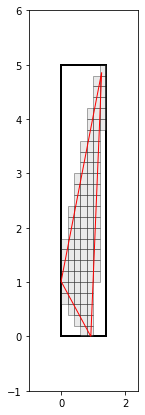

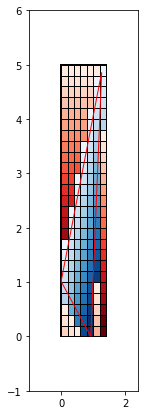

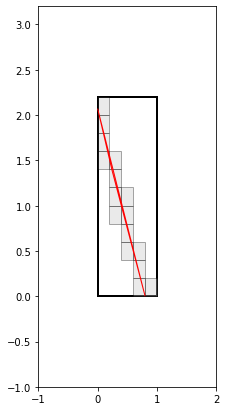

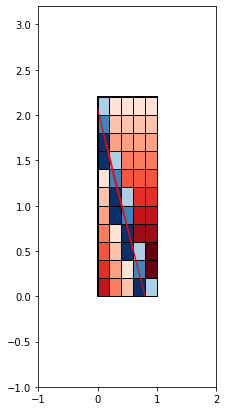

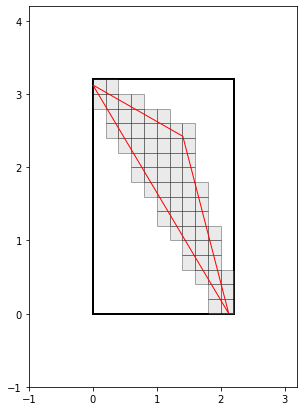

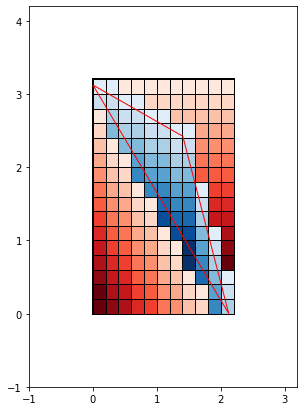

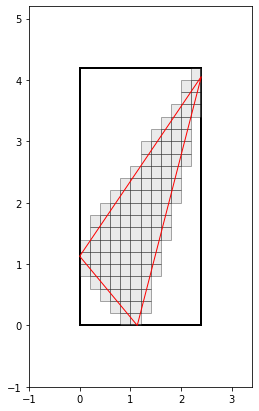

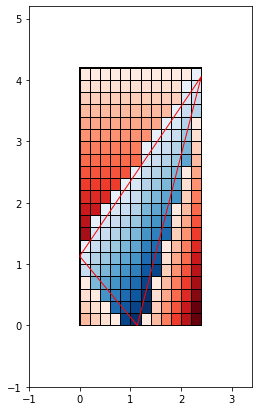

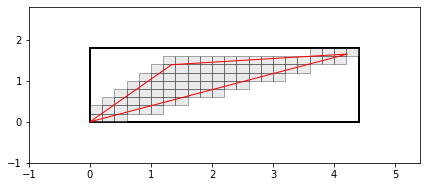

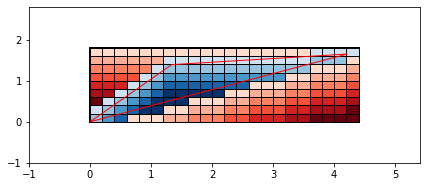

In [35]:
import numpy as np
from matplotlib import pyplot as plt
import math
import copy
import time
from smth2matrix.polygon2matrix import polygon2matrix
from smth2matrix.polyline2matrix import polyline2matrix
from smth2matrix.shift2zero import shift2zero
from shift_code.simple2shift import simple2shift
from shift_code.simple2revers_shift import simple2revers_shift
from shift_code.simple2mixed_shift import simple2mixed_shift
import generate

from matplotlib import patches

class Item:

    def __init__(self,
                 id: int,
                 points: list,
                 lb_x: float = None,
                 lb_y: float = None,
                 pallet_number: int = None,
                 matrix: list = np.empty([0,0])):
        self.id = id
        self.points = points
        self.lb_x = lb_x
        self.lb_y = lb_y
        self.pallet_number = pallet_number
        self.rotation = 0.0
        self.matrix = matrix
        self.listMatrix = None

    def set_matrix_rectangular(self, h):
        x_max = max(self.points[0][0], self.points[1][0])
        x_min = min(self.points[0][0], self.points[1][0])
        y_max = max(self.points[0][1], self.points[1][1])
        y_min = min(self.points[0][1], self.points[1][1])
        for i in range(0, (self.points).shape[0]):
            x_max = max(x_max, self.points[i][0])
            y_max = max(y_max, self.points[i][1])
            x_min = min(x_min, self.points[i][0])
            y_min = min(y_min, self.points[i][1])

        self.matrix = np.ones((math.ceil(
            (x_max - x_min) / h), math.ceil((y_max - y_min) / h)),
                              dtype="int")
        return None

    def set_matrix(self, h):
        self.matrix = polygon2matrix(self.points, h)
        return None

    def matrix_of_border(self, h):
        mat = polyline2matrix(self.points, h)
        return mat

    def rotationMatrix(self):
        # self.rotation = math.ceil(rotate / math.pi * 90)
        # if (self.rotation % 90 == 0):
        #     self.matrix = np.rot90(self.matrix, self.rotation // 90)
        # else:
        #     print("Не прямой поворот:", self.rotation)
        self.matrix = np.rot90(self.matrix)

        return None

    def list_of_ShiftC_4R(self, h):  # крутит против часовой стрелки
        self.set_matrix(h)
        li = np.array(
            [[simple2revers_shift(self.matrix),
              simple2shift(self.matrix)], [None, None], [None, None],
             [None, None]])
        for i in range(1, 4):
            li[i][0] = simple2revers_shift(np.rot90(self.matrix, i))
            li[i][1] = simple2shift(np.rot90(self.matrix, i))
        return li

    def list_of_MixedShiftC_4R(self, h):  # крутит против часовой стрелки

        if self.empty_matrix():
            self.set_matrix(h)
        li = np.array([None, None, None, None])

        self.matix = self.matrix.transpose()

        for i in range(0, 4):
            li[i] = np.rot90(simple2mixed_shift(np.rot90(self.matrix,3 + i )))
            # li[i] = simple2mixed_shift(np.rot90(self.matrix, i ))
        self.matix = self.matrix.transpose()
        self.listMatrix = li
        return None

    
    def empty_matrix(self):
        return self.matrix.size == 0


    def show_item(self):
        pointsX = []
        pointsY = []
        for point in self.points:
            pointsX.append(point[0])
            pointsY.append(point[1])
        pointsX.append(self.points[0][0])
        pointsY.append(self.points[0][1])
        plt.plot(np.array(pointsX), np.array(pointsY), '-k')
        plt.show()
        return

    def surfPoint(self):
        # вычисление размера массива

        # self.points = self.points.tolist()

        minX = sorted(self.points, key=lambda point: point[0])[0][0]
        minY = sorted(self.points, key=lambda point: point[1])[0][1]

        # print(minX)
        for point in self.points:
            point[0] = point[0] - minX
            point[1] = point[1] - minY

        # self.points = np.array(self.points)
        return None


def draw_simple_polygon(item, h):
    fig, ax = plt.subplots()
    MAX_SIZE = 7
    if item.matrix.shape[0] > item.matrix.shape[1]:
        fig.set_figheight(MAX_SIZE * item.matrix.shape[1]/item.matrix.shape[0])
        fig.set_figwidth(MAX_SIZE)
    else:
        fig.set_figheight(MAX_SIZE)
        fig.set_figwidth(MAX_SIZE * item.matrix.shape[0]/item.matrix.shape[1])
   
    pallet = patches.Rectangle((0, 0), h*item.matrix.shape[0], h*item.matrix.shape[1], linewidth=2, facecolor='none', edgecolor='black')
    ax.add_patch(pallet)
    ax.set_xlim(-1, h*item.matrix.shape[0] + 1)
    ax.set_ylim(-1, h*item.matrix.shape[1] + 1)

    for j in range(item.matrix.shape[1]):
        for i in range(item.matrix.shape[0]):
            if item.matrix[i][j]:
                sqver = np.array([[i, j], [i+1, j], [i+1, j+1], [i, j+1]])*h
                polygon = patches.Polygon(sqver, linewidth=1, facecolor='silver', edgecolor='black', alpha = 0.33)
                ax.add_patch(polygon)
    polygon = patches.Polygon(item.points, linewidth=1, edgecolor='red', fill = False)
    ax.add_patch(polygon)
    plt.show()

        
    # plt.savefig('pallet' + str(items[0].pallet_number) + '.png')
    return None

def draw_shift_polygon(item, h):
    fig, ax = plt.subplots()
    MAX_SIZE = 7
    if item.matrix.shape[0] > item.matrix.shape[1]:
        fig.set_figheight(MAX_SIZE * item.matrix.shape[1]/item.matrix.shape[0])
        fig.set_figwidth(MAX_SIZE)
    else:
        fig.set_figheight(MAX_SIZE)
        fig.set_figwidth(MAX_SIZE * item.matrix.shape[0]/item.matrix.shape[1])
   
    pallet = patches.Rectangle((0, 0), h*item.matrix.shape[0], h*item.matrix.shape[1], linewidth=2, facecolor='none', edgecolor='black')
    ax.add_patch(pallet)
    ax.set_xlim(-1, h*item.matrix.shape[0] + 1)
    ax.set_ylim(-1, h*item.matrix.shape[1] + 1)

    max_pl= np.amax(item.listMatrix[0])
    min_otr= np.amin(item.listMatrix[0])*(-1)


    cmapin = plt.cm.get_cmap('Blues', max_pl)
    cmapout = plt.cm.get_cmap('Reds', min_otr)
    for j in range(item.listMatrix[0].shape[1]):
        for i in range(item.listMatrix[0].shape[0]):
            if item.listMatrix[0][i][j] > 0:
                sqver = np.array([[i, j], [i+1, j], [i+1, j+1], [i, j+1]])*h
                polygon = patches.Polygon(sqver, linewidth=1, edgecolor='black', facecolor = cmapin(item.listMatrix[0][i][j]))
                ax.add_patch(polygon)
            else:
                sqver = np.array([[i, j], [i+1, j], [i+1, j+1], [i, j+1]])*h
                polygon = patches.Polygon(sqver, linewidth=1, edgecolor='black', facecolor = cmapout(item.listMatrix[0][i][j]*(-1)))
                ax.add_patch(polygon)

    polygon = patches.Polygon(item.points, linewidth=1, edgecolor='red', fill = False)
    ax.add_patch(polygon)
    plt.show()
    # plt.savefig('pallet' + str(items[0].pallet_number) + '.png')
    return None

if (__name__=='__main__'):
    h = 0.2

    # start_time=time.time()
    # eq1 = Item(1, np.array([[1, 0], [0.3, 3], [3, 3.7], [2.1, 0]]))
    # eq1.list_of_MixedShiftC_4R(0.025)
    # print(time.time() - start_time, " seconds")
    # print(eq1.matrix.shape)

    %run generate.py
    pallet_width = 10
    pallet_height = 10
    numPoligons = 5

    g = generate.Generator( pallet_width, pallet_height, numPoligons )
    g.start(h)
    items = g.data
    for it in items:
        # print(np.rot90(eq2.matrix))
        draw_simple_polygon(it, h)
        draw_shift_polygon(it, h)